# Ejemplo de Machine Learning con Python - Preprocesamiento y exploración

*Esta notebook fue creada originalmente como un blog post por [Raúl E. López Briega](http://relopezbriega.com.ar/) en [Matemáticas, Analisis de datos y Python](http://relopezbriega.github.io). El contenido esta bajo la licencia BSD.*

<img alt="Machine Learning" title="Machine Learning" src="http://relopezbriega.github.io/images/machine-learning.jpg">

## Introducción

En mi artículo [Machine Learning con Python](http://relopezbriega.github.io/blog/2015/10/10/machine-learning-con-python/), hice una breve introducción a los principales conceptos que debemos conocer de [Machine Learning](http://relopezbriega.github.io/tag/machine-learning.html). En este artículo, la idea es profundizar un poco más en ellos y presentar algunos conceptos nuevos con la ayuda de un ejemplo práctico.

### Descripción del ejemplo

En el ejemplo que vamos a utilizar, vamos a imaginarnos que una organización sin fines de lucro soporta su
operación mediante la organización periódica de una campaña para recaudar fondos por correo. Esta organización ha creado una base de datos con más de 40 mil personas que por lo menos una vez en el pasado ha sido donante.
La campaña de recaudación de fondos se realiza mediante el envío a una lista de correo (o un subconjunto de ella) de un regalo simbólico y la solicitud de una donación.
Una vez que se planifica la campaña, el costo total de la misma se conoce de forma automática:

**[número de potenciales donantes a contactar] x ([costo de regalo] + [costo de correo])**

Sin embargo, el resultado de la recaudación de fondos depende tanto del número de donantes que responde a la campaña, como del importe medio de dinero que es donado.

La idea es que, utilizando las técnicas de [Machine Learning](http://relopezbriega.github.io/tag/machine-learning.html) sobre la base de datos de esta organización, podamos ayudarla a maximizar los beneficios de la campaña de recaudación, esto es, lograr el máximo importe posible de dinero recaudado, minimizando lo más que se pueda el costo total de la campaña.
Debemos tener en cuenta que un miembro de la organización le enviará el correo a un potencial donante, siempre que el rendimiento esperado del pedido excede el costo del correo con la solicitud de donación. Para nuestro ejemplo, el costo por donante de la campaña va a ser igual al **[costo de regalo] + [costo de correo]**, y esto va a ser igual a **\$ 0.75** por correo enviado. Los ingresos netos de la campaña se calculan como la suma **(importe de donación real - \$ 0.75)** sobre todos los donantes a los que se ha enviado el correo. Nuestro objetivo es ayudar a esta organización sin fines de lucro a seleccionar de su lista de correo los donantes a los que debe abordar a los efectos de maximizar los beneficios de la campaña de recaudación.

### El Dataset

El [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) que vamos a utilizar, consiste en la base de datos de la organización sin fines de lucro con la lista de correo de los donantes de sus campañas anteriores. El mismo, ya lo hemos dividido en un [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) de aprendizaje que se pueden descargar del siguiente [enlace](https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/LEARNING.csv); y un [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) que vamos a utilizar para realizar las predicciones, el cual se lo pueden descargar desde este otro [enlace](https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/VALIDATION.csv).
Algunos otros datos a tener en cuenta, son los siguientes:

1. El [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) de aprendizaje contiene 47720 registros y 481 columnas. La primera fila / cabecera del mismo contiene los nombres de cada campo.
2. El [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) de validación contiene 47692 registros y 479 columnas. Al igual que en el caso anterior, la primera fila contiene los nombres de cada campo.
3. Los registros del [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) de validación son idénticos a los registros del [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) de aprendizaje, excepto que los valores para nuestros campos objetivo que necesitamos para el aprendizaje, no existen(es decir, las columnas DONOR_FLAG y DONOR_AMOUNT no están incluidas en el [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) de validación).
4. Los espacios en blanco en los campos de tipo texto y los puntos en los campos de tipo numérico corresponden a valores faltantes o perdidos.
5. Cada registro tiene un identificador único de registro o índice (campo IDX). Para cada registro, hay dos variables objetivo (campos DONOR_FLAG y DONOR_AMOUNT). DONOR_FLAG es una variable binaria que indica si ese registro fue donante o no; mientras que DONOR_AMOUNT contiene el importe de la donación para los casos que fueron donantes.
6. Algunos de los valores en el [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) pueden contener errores de formato o de ingreso. Por lo que se deberían corregir o limpiar.
7. Una descripción detallada del significado de cada columna del [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos), la pueden encontrar en el siguiente [enlace](https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/describe_dataset.txt).


## Análisis exploratorio y preprocesamiento

El primer paso que deberíamos emprender, es realizar un pequeño [análisis exploratorio](https://es.wikipedia.org/wiki/An%C3%A1lisis_exploratorio_de_datos) de nuestro [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos); es decir, valernos de algunos herramientas de la [estadística](https://es.wikipedia.org/wiki/Estad%C3%ADstica), junto con algunas visualizaciones para entender un poco más los datos de los que disponemos. Veamos como podemos hacer esto.

In [1]:
# <!-- collapse=True -->
# Importando las librerías que vamos a utilizar
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

# graficos incrustados
%matplotlib inline

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [2]:
# importando el dataset a un Dataframe de Pandas
ONG_data = pd.read_csv('LEARNING.csv', header=0)

In [3]:
# Examinando las primeras 10 filas y 10 columnas del dataset
ONG_data.ix[:10, :10]

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE
0,8901,GRI,0,IL,61081,,,3712,0,
1,9401,NWN,0,LA,70611,,,0,0,
2,9401,MSD,1,TN,37127-,,,3211,0,
3,8901,ENQ,0,MN,56475,,,2603,0,
4,9201,HCC,1,LA,70791,,,0,0,X
5,9301,USB,1,UT,84720,,,2709,0,
6,9401,FRC,1,CA,90056,,,0,0,
7,8801,PCH,2,IL,62376,,,5201,0,
8,8601,AMB,28,FL,32810,B,,3601,0,
9,9501,L15,1,NC,27850,,,0,0,


In [4]:
# Controlando la cantidad de registros
ONG_data['DONOR_AMOUNT'].count()

47720

Como podemos ver, utilizando simples expresiones de [Python](http://python.org/), podemos cargar la base de datos de la ONG en un *[Dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html)* de [Pandas](http://pandas.pydata.org/); lo que nos va a permitir manipular los datos con suma facilidad. Comenzemos a explorar un poco más en detalle este [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos)!

En primer lugar, lo que deberíamos hacer es controlar si existen valores faltantes o nulos; esto lo podemos realizar utilizando el método `isnull()` del siguiente modo:

In [5]:
# Controlando valores nulos
ONG_data.isnull().any().any()

True

Como podemos ver, el método nos devuelve el valor "True", lo que indica que existen valores nulos en nuestro [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos). Estos valores pueden tener una influencia significativa en nuestro modelo predictivo, por lo que siempre es una decisión importante determinar la forma en que los vamos a manejar. Las alternativas que tenemos son:

1. Dejarlos como están, lo que a la larga nos va a traer bastantes dolores de cabeza ya que en general los algoritmos no los suelen procesar correctamente y provocan errores.
2. Eliminarlos, lo que es una alternativa viable aunque, dependiendo la cantidad de valores nulos, puede afectar significativamente el resultado final de nuestro modelo predictivo.
3. Inferir su valor. En este caso, lo que podemos hacer es tratar de inferir el valor faltante y reemplazarlo por el valor inferido. Esta suele ser generalmente la mejor alternativa a seguir.

En este ejemplo, yo voy a utilizar la última alternativa. Vamos a inferir los valores faltantes utilizando la [media aritmética](https://es.wikipedia.org/wiki/Media_aritm%C3%A9tica) para los [datos cuantitativos](http://relopezbriega.github.io/blog/2016/03/13/analisis-de-datos-cuantitativos-con-python/) y la <a href="https://es.wikipedia.org/wiki/Moda_(estad%C3%ADstica)">moda</a> para los [datos categóricos](http://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/).

Como vamos a utilizar dos métodos distintos para reemplazar a los valores faltantes, dependiendo de si son [numéricos](http://relopezbriega.github.io/blog/2016/03/13/analisis-de-datos-cuantitativos-con-python/) o [categóricos](http://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/), el primer paso que debemos realizar es tratar de identificar que columnas de nuestro [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) corresponde a cada tipo de datos; para realizar esto vamos a utilizar el atributo `dtypes` del *[Dataframe](http://pandas.pydata.org/pandas-docs/stable/dsintro.html)* de [Pandas](http://pandas.pydata.org/). 

In [6]:
# Agrupando columnas por tipo de datos
tipos = ONG_data.columns.to_series().groupby(ONG_data.dtypes).groups

# Armando lista de columnas categóricas
ctext = tipos[np.dtype('object')]
len(ctext)  # cantidad de columnas con datos categóricos. 

68

In [7]:
# Armando lista de columnas numéricas
columnas = ONG_data.columns  # lista de todas las columnas
cnum = list(set(columnas) - set(ctext))
len(cnum)

413

Ahora ya logramos separar a las 481 columnas que tiene nuestro [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos). 68 columnas contienen [datos categóricos](http://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/) y 413 contienen [datos cuantitativos](http://relopezbriega.github.io/blog/2016/03/13/analisis-de-datos-cuantitativos-con-python/). Procedamos a inferir los valores faltantes.

In [8]:
# Completando valores faltantas datos cuantititavos
for c in cnum:
    mean = ONG_data[c].mean()
    ONG_data[c] = ONG_data[c].fillna(mean)

In [9]:
# Completando valores faltantas datos categóricos
for c in ctext:
    mode = ONG_data[c].mode()[0]
    ONG_data[c] = ONG_data[c].fillna(mode)

In [10]:
# Controlando que no hayan valores faltantes
ONG_data.isnull().any().any()

False

In [11]:
# Guardando el dataset preprocesado
# Save transform datasets
ONG_data.to_csv("LEARNING_procesado.csv", index=False)

Perfecto! Ahora tenemos un [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) limpio de valores faltantes. Ya estamos listos para comenzar a explorar los datos, comencemos por determinar el porcentaje de personas que alguna vez fue donante de la ONG y están incluidos en la base de datos con la que estamos trabajando.

In [12]:
# Calculando el porcentaje de donantes sobre toda la base de datos
porcent_donantes = (ONG_data[ONG_data.DONOR_AMOUNT 
                             > 0]['DONOR_AMOUNT'].count() * 1.0
       / ONG_data['DONOR_AMOUNT'].count()) * 100.0
print("El procentaje de donantes de la base de datos es {0:.2f}%"
      .format(porcent_donantes))

El procentaje de donantes de la base de datos es 5.08%


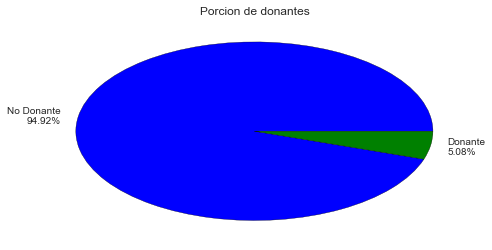

In [13]:
# Grafico de totas del porcentaje de donantes
# Agrupando por DONOR_FLAG
donantes = ONG_data.groupby('DONOR_FLAG').IDX.count() 
# Creando las leyendas del grafico.
labels = [ 'Donante\n' + str(round(x * 1.0 / donantes.sum() * 
                            100.0, 2)) + '%'  for x in donantes ]
labels[0] = 'No ' + labels[0]

plt.pie(donantes, labels=labels)
plt.title('Porcion de donantes')
plt.show()

In [14]:
# Creando subset con solo los donates
ONG_donantes = ONG_data[ONG_data.DONOR_AMOUNT > 0]

# cantidad de donantes
len(ONG_donantes)

2423

Aquí podemos ver que el porcentaje de personas que fueron donantes en el pasado es realmente muy bajo, solo un 5 % del total de la base de datos (2423 personas). Este es un dato importante a tener en cuenta ya que al existir tanta diferencia entre las *clases* a clasificar, esto puede afectar considerablemente a nuestro [algoritmo](https://es.wikipedia.org/wiki/Algoritmo) de aprendizaje.
Exploremos también un poco más en detalle a este grupo pequeño de personas que fueron donantes; veamos por ejemplo como se dividen de acuerdo a la cantidad de dinero donado.

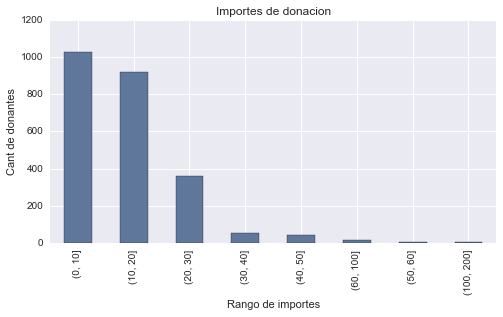

In [15]:
# Analizando el importe de donanciones
# Creando un segmentos de importes
imp_segm = pd.cut(ONG_donantes['DONOR_AMOUNT'], 
                  [0, 10,  20, 30, 40, 50, 60, 100, 200])
# Creando el grafico de barras desde pandas
plot = pd.value_counts(imp_segm).plot(kind='bar',
                                      title='Importes de donacion')
plot.set_ylabel('Cant de donantes')
plot.set_xlabel('Rango de importes')
plt.show()

In [16]:
# Agrupación por segmento segun importe donado.
pd.value_counts(imp_segm)

(0, 10]       1026
(10, 20]       921
(20, 30]       358
(30, 40]        53
(40, 50]        43
(60, 100]       15
(50, 60]         4
(100, 200]       3
dtype: int64

In [17]:
# importe de donación promedio
ONG_donantes['DONOR_AMOUNT'].mean()

15.598237721832438

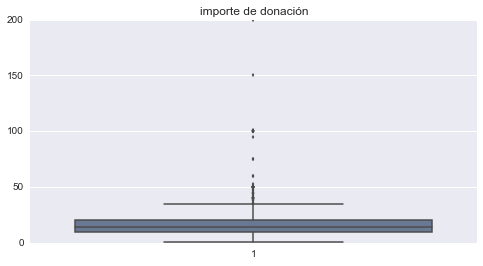

In [18]:
# Gráfico de cajas del importe de donación
sns.boxplot(list(ONG_donantes['DONOR_AMOUNT']))
plt.title('importe de donación')
plt.show()

Este análisis nos muestra que la mayor cantidad de donaciones caen en un rango de importes entre 0 y 30, siendo la donación promedio 15.60. También podemos ver que donaciones que superen un importe de 50 son casos realmente poco frecuentes, por lo que constituyen [valores atípicos](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico) y sería prudente eliminar estos casos al entrenar nuestro modelo para que no distorsionen los resultados.

Otra exploración interesante que podríamos realizar sobre nuestro [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) relacionado con los donantes, es ver como se divide este grupo en términos de género y edad. Comencemos con el género!

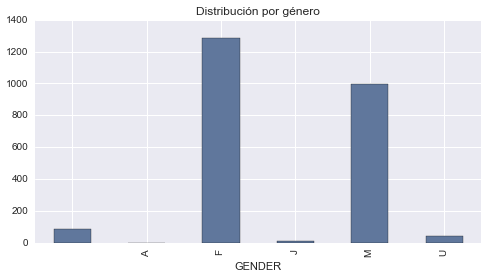

In [19]:
# Grafico del género de los donantes
ONG_donantes.groupby('GENDER').size().plot(kind='bar')
plt.title('Distribución por género')
plt.show()

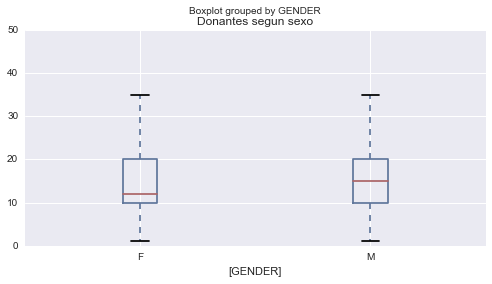

In [20]:
# Donaciones segun el género
ONG_donantes[(ONG_donantes.DONOR_AMOUNT <= 50)
             & (ONG_donantes.GENDER.isin(['F', 'M'])
               )][['DONOR_AMOUNT', 'GENDER']].boxplot(by='GENDER')
plt.title('Donantes segun sexo')
plt.show()

In [21]:
# Media de impote donado por mujeres
ONG_donantes[ONG_donantes.GENDER == 'F'][['DONOR_AMOUNT']].mean()

DONOR_AMOUNT    14.610311
dtype: float64

In [22]:
# Media de impote donado por hombres
ONG_donantes[ONG_donantes.GENDER == 'M'][['DONOR_AMOUNT']].mean()

DONOR_AMOUNT    16.81989
dtype: float64

Aquí vemos que las mujeres suelen estar más propensas a donar, aunque donan un importe promedio menor (14.61) al que donan los hombres (16.82). Veamos ahora como se comportan las donaciones respecto a la edad.

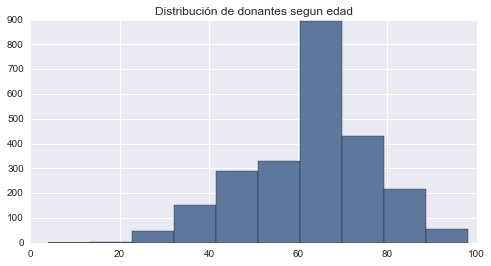

In [23]:
# Distribución de la edad de los donantes
ONG_donantes['AGE'].hist().set_title('Distribución de donantes segun edad')
plt.show()

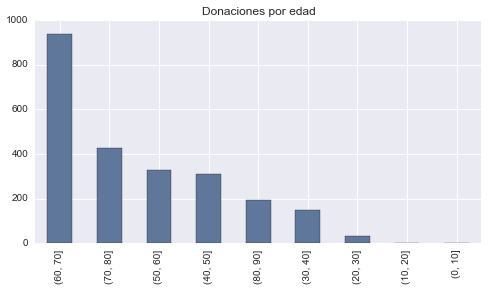

In [24]:
# Agrupando la edad por rango de a 10
AGE2 = pd.cut(ONG_donantes['AGE'], range(0, 100, 10))
ONG_donantes['AGE2'] = AGE2

# Gráfico de barras de donaciones por edad
pd.value_counts(AGE2).plot(kind='bar', title='Donaciones por edad')
plt.show()

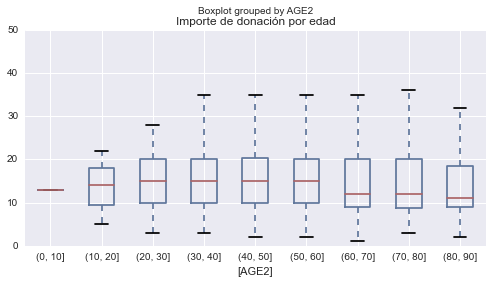

In [25]:
# Importes de donación por grango de edad
ONG_donantes[ONG_donantes.DONOR_AMOUNT <= 50][['DONOR_AMOUNT', 
                                               'AGE2']].boxplot(by='AGE2')
plt.title('Importe de donación por edad')
plt.show()

En este último análisis podemos ver que la mayor cantidad de los donantes son personas de entre 60 y 70 años, aunque la media de importe donado más alta la tienen las personas que van desde los 30 a los 60 años. 

Con esto concluyo este análisis; en próximos artículos voy a continuar con el ejemplo completando los restantes pasos que incluye un proyecto de [Machine Learning](http://relopezbriega.github.io/tag/machine-leraning.html) hasta concluir el modelo y poder utilizarlo para realizar predicciones (selección de atributos - armado de modelo - entrenamiento - evaluación - métricas - predicción). Espero lo hayan disfrutado tanto como yo disfrute al escribirlo!

Saludos!

*Este post fue escrito utilizando IPython notebook. Pueden descargar este [notebook](https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/MachineLearningPractica.ipynb) o ver su version estática en [nbviewer](http://nbviewer.ipython.org/github/relopezbriega/relopezbriega.github.io/blob/master/downloads/MachineLearningPractica.ipynb).*